# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(palette='Set2')

In [3]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [4]:
# Ваш код здесь
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
adver_data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


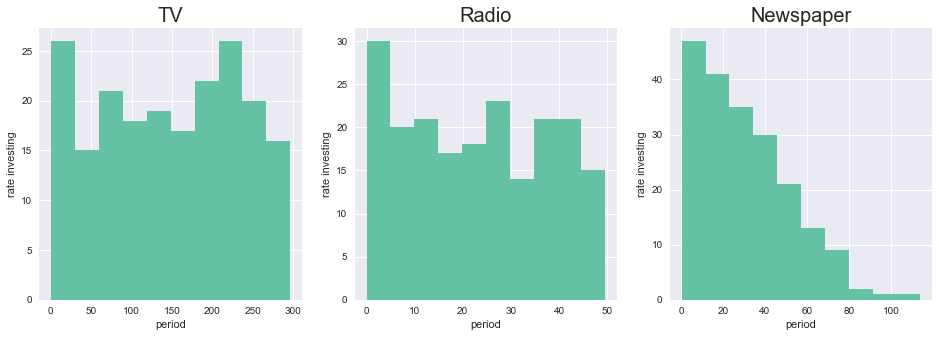

In [6]:
# Ваш код здесь
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(1,3,1)
ax.hist(adver_data.TV)
ax.set_title('TV', fontsize=20)
ax.set_ylabel('rate investing')
ax.set_xlabel('period')

ax=fig.add_subplot(1,3,2)
ax.hist(adver_data.Radio)
ax.set_title('Radio', fontsize=20)
ax.set_ylabel('rate investing')
ax.set_xlabel('period')

ax=fig.add_subplot(1,3,3)
ax.hist(adver_data.Newspaper)
ax.set_title('Newspaper', fontsize=20)
ax.set_ylabel('rate investing')
ax.set_xlabel('period');



**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [7]:
X = np.array([adver_data.TV.values , adver_data.Radio.values, adver_data.Newspaper.values])
y = adver_data.Sales.values


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [8]:
for i in range(0, X.shape[1]):
    X[:,i]= (X[:,i]-X.mean(axis=1))/X.std(axis=1)

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [9]:
import numpy as np
c = np.ones(( X.shape[1],1))
X=X.reshape(3,200,1)
X = np.hstack((X[0,:],X[1,:],X[2,:],c))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [10]:
def mserror(y, y_pred):
    return np.linalg.norm(y-y_pred)/200
    

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [11]:
y = adver_data.Sales.values
y_pred = np.average(y)
answer1 = mserror(y, y_pred)
print(answer1)
write_answer_to_file(answer1, '1.txt')

0.368006411289


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [12]:
xtx = np.dot(X.T,X)
c=np.dot(np.linalg.inv(xtx), X.T)
def normal_equation(X, y):
    return np.dot(c,y) 

In [13]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[  1.02555494   0.96832958  -0.42044836  12.26536153]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [14]:
X_avg = np.zeros((3,200))
X_avg = X_avg.reshape(3,200,1)
c = np.ones(( 200,1))
X_avg = np.hstack((X_avg[0,:],X_avg[1,:],X_avg[2,:],c))


In [15]:
answer2 = normal_equation(X_avg, y)
print(answer2)
write_answer_to_file(answer2, '2.txt')

ValueError: shapes (200,1) and (200,) not aligned: 1 (dim 1) != 200 (dim 0)

In [16]:
def linear_prediction(X, w):
    return X*w
    # Ваш код здесь

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [17]:
answer3 = # Ваш код здесь
print(answer3)
write_answer_to_file(answer3, '3.txt')

SyntaxError: invalid syntax (<ipython-input-17-96a5bf94a2c9>, line 1)

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [18]:
w=np.array([1, 1, 1, 1]). T
w.shape
a=np.dot(w,X[1,:])
v=np.dot(w,X[train_ind,:])-y[train_ind]
v.shape
s=X[1,0]
s.shape

NameError: name 'train_ind' is not defined

In [19]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = (2/200)*X[train_ind,0]*(np.dot(w,X[train_ind,:])-y[train_ind])
    grad1 = (2/200)*X[train_ind,1]*(np.dot(w,X[train_ind,:])-y[train_ind])
    grad2 = (2/200)*X[train_ind,2]*(np.dot(w,X[train_ind,:])-y[train_ind])
    grad3 = (2/200)*X[train_ind,3]*(np.dot(w,X[train_ind,:])-y[train_ind])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [20]:
w=np.array([0, 0, 0, 0]). T
stochastic_gradient_step(X, y, w, 17, eta=0.01)

array([ 0.00381512,  0.00296802,  0.00335431,  0.00244   ])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [56]:
m=np.array([1, 1, 1, 1]).T
v=np.array([0, 0, 0, 0]).T
a=np.c_[a, v]
a

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [128]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    W_all = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    np.random.seed(seed)
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
       
        random_ind = np.random.randint(X.shape[0])
       
        w=stochastic_gradient_step(X, y, w, random_ind, eta=0.01)
        if iter_num == 0:
            W_all = np.c_[W_all, w]
        else:
            W_all = np.c_[W_all[:,1], w]
        errors.append(np.linalg.norm(y-X.dot(w))/200)
        weight_dist=np.linalg.norm(W_all[:,0]-W_all[:,1])
        #if iter_num % 100 == 0:
         #   print(iter_num)
        iter_num+=1
        
    return w, errors

In [118]:
w_init=np.array([0, 0, 0, 0]). T
#W_all = w_init
random_ind = np.random.randint(X.shape[0])
w=stochastic_gradient_step(X, y, w, random_ind, eta=0.01)
W_all = np.c_[W_all, w]
errors.append(np.linalg.norm(y-X.dot(w))/200)
W_all
errors.append(np.linalg.norm(y-X.dot(w))/200)
#np.linalg.norm(W_all[:,1+1]-W_all[:,1])


W_all

array([[ 0.        ,  0.04153055,  0.04405388,  0.0428335 ,  0.04327157,
         0.0447814 ,  0.04409518,  0.04742365,  0.05008239,  0.05029909,
         0.054811  ,  0.06220748],
       [ 0.        ,  0.03125153,  0.03456632,  0.03569706,  0.03849524,
         0.03816671,  0.0408979 ,  0.04208467,  0.04472483,  0.04584395,
         0.04627007,  0.05348103],
       [ 0.        ,  0.03222144,  0.03398153,  0.03469368,  0.03799339,
         0.03936167,  0.04078104,  0.04288866,  0.04673257,  0.04917394,
         0.05258988,  0.05729691],
       [ 0.        ,  0.03164054,  0.03388556,  0.03492126,  0.03650303,
         0.03749886,  0.03895624,  0.04018954,  0.04210452,  0.0427429 ,
         0.04392352,  0.04558992]])

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [132]:
w_init=np.array([0, 0, 0, 0]). T
res = stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=100000,
                                min_weight_dist=1e-8, seed=42, verbose=False)

In [131]:
res[1][-1]

0.47918735624816722

In [133]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = res

Wall time: 0 ns


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


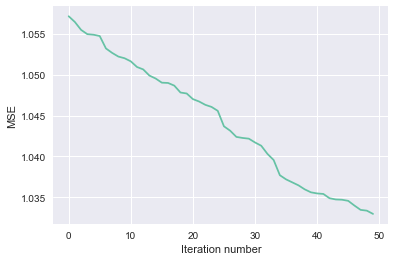

In [135]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE');

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


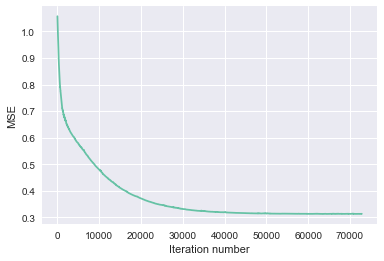

In [137]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE');

**Посмотрим на вектор весов, к которому сошелся метод.**

In [138]:
stoch_grad_desc_weights

array([  1.01797933,   0.88950592,  -0.39111812,  12.03195386])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [139]:
stoch_errors_by_iter[-1]

0.31307316598682217

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [140]:
answer4 = stoch_errors_by_iter[-1]
print(answer4)
write_answer_to_file(answer4, '4.txt')

0.313073165987


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**